In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

preprocessed = pd.read_csv("data/preprocessed.csv")
cluster_features = pd.read_csv("data/cluster_label_features.csv")
cluster_features.rename(columns={"Unnamed: 0": "original_index"}, inplace=True)

cluster_features = cluster_features[["original_index", "cluster", "opr_mean_pct_diff"]].copy()

preprocessed = preprocessed.merge(cluster_features, right_on="original_index", left_index=True)
preprocessed.drop(columns=["original_index"], inplace=True)


In [3]:
preprocessed

,surface_x,surface_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate,number_of_lateral_stages,cluster,opr_mean_pct_diff
0,1.379916e+06,7.178450e+05,3810.039370,12.000000,286571.42860,1.621424e+06,8801.181102,NaN,1.0,Standalone Well,Non-Batch Frac,Standalone Well,4.532599,10.785716,317.503281,5,-0.35423
1,1.384891e+06,7.065820e+05,4017.716535,11.000000,135363.78570,1.016599e+06,8605.314961,NaN,1.0,Outer Well,Non-Batch Frac,Infill Child Well,3.367296,83.512989,365.246958,5,-0.35423
2,1.389082e+06,7.167512e+05,3355.314961,10.269002,111142.85710,5.621877e+05,8718.503937,Slickwater Crosslink Hybrid,1.0,Standalone Well,Non-Batch Frac,Standalone Well,3.465736,35.415958,269.677399,5,-0.35423
3,1.390003e+06,7.058670e+05,3786.417323,11.467878,93000.00000,6.713527e+05,8544.291339,Slickwater Crosslink Hybrid,1.0,Outer Well,Non-Batch Frac,Sibling Well,3.044522,207.392492,297.963085,5,-0.35423
4,1.386198e+06,7.063927e+05,3535.433071,11.025602,117142.85710,4.401761e+05,8627.952756,Slickwater Crosslink Hybrid,1.0,Inner Well,Non-Batch Frac,Infill Child Well,3.988984,34.520720,280.922628,5,-0.35423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,9.326688e+05,1.059044e+06,1537.401575,6.000000,36657.85714,3.105691e+05,8313.976378,Slickwater Crosslink Hybrid,0.0,Standalone Well,Non-Batch Frac,Standalone Well,3.784190,30.071433,0.000000,2,0.19110
12967,9.334519e+05,1.056947e+06,1648.622047,7.022801,73000.00000,2.718752e+05,8346.456693,Crosslink Only,0.0,Standalone Well,Non-Batch Frac,Standalone Well,3.555348,2.912841,174.981365,2,0.19110
12968,9.411536e+05,9.364229e+05,4194.881890,19.000000,124907.28570,1.018071e+06,11594.488190,Crosslink Only,1.0,Standalone Well,Non-Batch Frac,Standalone Well,2.302585,292.226236,220.783257,2,0.19110
12969,9.669162e+05,1.057804e+06,3660.433071,11.449393,87857.14286,6.214390e+05,8640.748031,Slickwater Crosslink Hybrid,1.0,Standalone Well,Non-Batch Frac,Standalone Well,4.290459,7.171827,291.666202,2,0.19110


## Clean nulls

In [4]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12971 entries, 0 to 12970
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surface_x                  12971 non-null  float64
 1   surface_y                  12971 non-null  float64
 2   gross_perforated_length    12971 non-null  float64
 3   number_of_stages           12971 non-null  float64
 4   total_proppant             12971 non-null  float64
 5   total_fluid                12971 non-null  float64
 6   true_vertical_depth        12956 non-null  float64
 7   ffs_frac_type              12674 non-null  object 
 8   bin_lateral_length         12971 non-null  float64
 9   relative_well_position     12971 non-null  object 
 10  batch_frac_classification  12971 non-null  object 
 11  well_family_relationship   12971 non-null  object 
 12  frac_seasoning             12971 non-null  float64
 13  OilPeakRate                12971 non-null  float64


In [5]:
preprocessed.isnull().any()

surface_x                    False
surface_y                    False
gross_perforated_length      False
number_of_stages             False
total_proppant               False
total_fluid                  False
true_vertical_depth           True
ffs_frac_type                 True
bin_lateral_length           False
relative_well_position       False
batch_frac_classification    False
well_family_relationship     False
frac_seasoning               False
OilPeakRate                  False
number_of_lateral_stages     False
cluster                      False
opr_mean_pct_diff            False
dtype: bool

In [6]:
preprocessed.isnull().sum() / preprocessed.shape[0]

surface_x                    0.000000
surface_y                    0.000000
gross_perforated_length      0.000000
number_of_stages             0.000000
total_proppant               0.000000
total_fluid                  0.000000
true_vertical_depth          0.001156
ffs_frac_type                0.022897
bin_lateral_length           0.000000
relative_well_position       0.000000
batch_frac_classification    0.000000
well_family_relationship     0.000000
frac_seasoning               0.000000
OilPeakRate                  0.000000
number_of_lateral_stages     0.000000
cluster                      0.000000
opr_mean_pct_diff            0.000000
dtype: float64

In [7]:
# use mean imputation to cover nulls
preprocessed["gross_perforated_length"] = preprocessed["gross_perforated_length"].fillna(preprocessed["gross_perforated_length"].mean())
preprocessed["total_proppant"] = preprocessed["total_proppant"].fillna(preprocessed["total_proppant"].mean())
preprocessed["total_fluid"] = preprocessed["total_fluid"].fillna(preprocessed["total_fluid"].mean())
preprocessed["bin_lateral_length"] = preprocessed["bin_lateral_length"].fillna(preprocessed["bin_lateral_length"].mean())
preprocessed["true_vertical_depth"] = preprocessed["true_vertical_depth"].fillna(preprocessed["true_vertical_depth"].mean())
# preprocessed["ffs_frac_type"] = preprocessed["ffs_frac_type"].fillna(preprocessed["true_vertical_depth"].mean())

In [8]:
preprocessed.isnull().any()

surface_x                    False
surface_y                    False
gross_perforated_length      False
number_of_stages             False
total_proppant               False
total_fluid                  False
true_vertical_depth          False
ffs_frac_type                 True
bin_lateral_length           False
relative_well_position       False
batch_frac_classification    False
well_family_relationship     False
frac_seasoning               False
OilPeakRate                  False
number_of_lateral_stages     False
cluster                      False
opr_mean_pct_diff            False
dtype: bool

# Encode categorical variables

In [9]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12971 entries, 0 to 12970
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surface_x                  12971 non-null  float64
 1   surface_y                  12971 non-null  float64
 2   gross_perforated_length    12971 non-null  float64
 3   number_of_stages           12971 non-null  float64
 4   total_proppant             12971 non-null  float64
 5   total_fluid                12971 non-null  float64
 6   true_vertical_depth        12971 non-null  float64
 7   ffs_frac_type              12674 non-null  object 
 8   bin_lateral_length         12971 non-null  float64
 9   relative_well_position     12971 non-null  object 
 10  batch_frac_classification  12971 non-null  object 
 11  well_family_relationship   12971 non-null  object 
 12  frac_seasoning             12971 non-null  float64
 13  OilPeakRate                12971 non-null  float64


**ffs_fract_type**

In [10]:
preprocessed.ffs_frac_type.value_counts(dropna=False, normalize=True)

ffs_frac_type
Slickwater Only                0.334978
Slickwater Crosslink Hybrid    0.297587
Slickwater Linear Hybrid       0.215018
Undefined                      0.067458
Crosslink Only                 0.057898
NaN                            0.022897
Linear Only                    0.004163
Name: proportion, dtype: float64

In [11]:
preprocessed.ffs_frac_type = preprocessed.ffs_frac_type.fillna("Undefined").map({
    "Slickwater Crosslink Hybrid": "sch",
    "Slickwater Only": "so",
    "8810.144334222554": "number",
    "Slickwater Linear Hybrid": "slh",
    "Undefined": "undefined",
    "Crosslink Only": "co",
    "Linear Only": "lo",
})
preprocessed.ffs_frac_type.value_counts(dropna=False)

ffs_frac_type
so           4345
sch          3860
slh          2789
undefined    1172
co            751
lo             54
Name: count, dtype: int64

In [12]:
preprocessed.columns

Index(['surface_x', 'surface_y', 'gross_perforated_length', 'number_of_stages',
       'total_proppant', 'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'bin_lateral_length', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship',
       'frac_seasoning', 'OilPeakRate', 'number_of_lateral_stages', 'cluster',
       'opr_mean_pct_diff'],
      dtype='object')

## Get dummies

In [13]:
# OHE encode categorical variables
ohe_cols = ["ffs_frac_type",
"relative_well_position",
"batch_frac_classification",
"well_family_relationship"]

for col in ohe_cols:
    preprocessed = pd.concat([preprocessed, pd.get_dummies(preprocessed[col], prefix=col)], axis=1)
    preprocessed.drop(columns=[col], inplace=True)

preprocessed.shape

(12971, 31)

# Randomized Search CV with XGBoost

In [14]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [15]:
preprocessed.drop(columns=["number_of_lateral_stages"], inplace=True)

In [24]:
preprocessed = preprocessed[preprocessed.OilPeakRate <= preprocessed.OilPeakRate.quantile(.99)].copy()

In [25]:
TARGET_COL = "OilPeakRate"
SEED = 1234

X = preprocessed.drop(columns=[TARGET_COL] + ["cluster"])
y = preprocessed[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Vanilla model

In [26]:
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=SEED)

params = {
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 5, 7, 9],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 0.9],
    "colsample_bytree": [0.5, 0.7, 0.9],
    "n_estimators": [100, 200, 300, 500],
}

search = RandomizedSearchCV(model,
                        param_distributions=params,
                        n_iter=50,
                        scoring="neg_mean_squared_error",
                        n_jobs=-1, cv=5, 
                        verbose=0, random_state=SEED)

search.fit(X_train, y_train)

y_pred = search.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  7134.886827446404
MAE:  62.29717619804677
MAPE:  0.5607409625871927
RMSE:  84.46825928978532


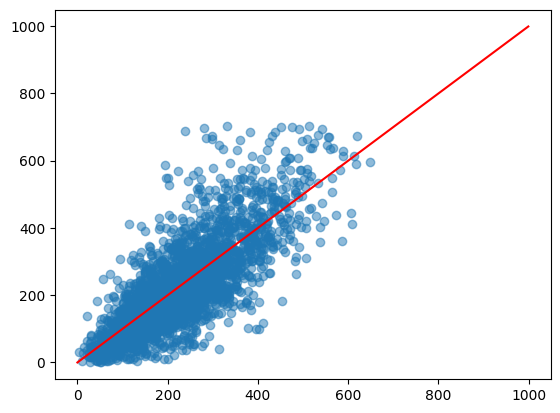

In [27]:
plt.scatter(
    y_pred,
    y_test,
    alpha=0.5
)

plt.plot(np.arange(0, 1000), np.arange(0, 1000), color="red")   

In [28]:
preprocessed.OilPeakRate.describe()

count    12841.000000
mean       222.479640
std        134.553798
min          0.369048
25%        121.642876
50%        200.429793
75%        301.241316
max        703.726299
Name: OilPeakRate, dtype: float64

In [29]:
preprocessed.columns

Index(['surface_x', 'surface_y', 'gross_perforated_length', 'number_of_stages',
       'total_proppant', 'total_fluid', 'true_vertical_depth',
       'bin_lateral_length', 'frac_seasoning', 'OilPeakRate', 'cluster',
       'opr_mean_pct_diff', 'ffs_frac_type_co', 'ffs_frac_type_lo',
       'ffs_frac_type_sch', 'ffs_frac_type_slh', 'ffs_frac_type_so',
       'ffs_frac_type_undefined', 'relative_well_position_Inner Well',
       'relative_well_position_Outer Well',
       'relative_well_position_Standalone Well',
       'relative_well_position_Unknown',
       'batch_frac_classification_Batch-Concurrent Frac',
       'batch_frac_classification_Batch-Sequential Frac',
       'batch_frac_classification_Non-Batch Frac',
       'batch_frac_classification_Unknown',
       'well_family_relationship_Infill Child Well',
       'well_family_relationship_Sibling Well',
       'well_family_relationship_Standalone Well',
       'well_family_relationship_Unknown'],
      dtype='object')

# Without nulls